> # Spam Classification

## I- Package

In [173]:
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Text Preprocessing
from sklearn.feature_extraction.text import CountVectorizer

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import wordcloud

%matplotlib inline

# II- Data

In [15]:
data_01 = pd.read_csv('./data/spam.csv', encoding='latin-1')

data_01.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

data_01.replace('ham', 0, inplace=True)
data_01.replace('spam', 1, inplace=True)

data_01.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
X = data_01['v2']
y = data_01['v1']

## II- 2- Data preprocessing

### 2.1 Tokenization

In [77]:
subject  = data_01['v2']

decoded = []
for i in range(len(subject)):
    decoded.append(subject[i].decode('latin-1'))

tokenized_subject = []
for i in range(len(decoded)):
    tokenized_subject.append(word_tokenize(decoded[i]))


### 2.2 Stop words removal

In [93]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

tokenized_subject2 = []
for i in range(len(tokenized_subject)):
    phrase = []
    for word in tokenized_subject[i]:
        if word.lower() not in stopwords:
            phrase.append(word)
    tokenized_subject2.append(phrase)
    

['Even', 'brother', 'like', 'speak', '.', 'treat', 'like', 'aids', 'patent', '.']


### 2.3 remove punctuation

In [95]:
tokenized_subject3 = []

for i in range(len(tokenized_subject2)):
    phrase = []
    for word in tokenized_subject2[i]:
        if word.isalpha():
            phrase.append(word)
    tokenized_subject3.append(phrase)
    
print(tokenized_subject3[:5])

[['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat'], ['Ok', 'lar', 'Joking', 'wif', 'u', 'oni'], ['Free', 'entry', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', 'May', 'Text', 'FA', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'C', 'apply'], ['U', 'dun', 'say', 'early', 'hor', 'U', 'c', 'already', 'say'], ['Nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']]


### 2.4 lower case

In [97]:
tokenized_subject4 = []

for i in range(len(tokenized_subject3)):
    phrase = []
    for word in tokenized_subject3[i]:
        phrase.append(word.lower())
    tokenized_subject4.append(phrase)
    
print(tokenized_subject4[:5])
print(len(tokenized_subject4))

[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply'], ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'], ['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']]
5572


### 2.5 Stemming

In [119]:
stemmer = PorterStemmer()

tokenized_subject5 = []

for i in range(len(tokenized_subject4)):
    phrase = []
    for word in tokenized_subject4[i]:
        phrase.append(stemmer.stem(word))
    tokenized_subject5.append(phrase)
    
print(tokenized_subject5[0])

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']


### 2.6 Vectorization

In [121]:
vectorizer = CountVectorizer()
fit_vec = vectorizer.fit([' '.join(words) for words in tokenized_subject5])

In [122]:
fit_vec.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zoom', 'zouk', 'zyada'], dtype=object)

In [125]:
tran_vec = fit_vec.transform([' '.join(words) for words in tokenized_subject5])

In [127]:
words_matrix = tran_vec.toarray()
words_matrix.shape

(5572, 5816)

In [128]:
word_mtx_df = pd.DataFrame(words_matrix, columns=fit_vec.get_feature_names_out())
word_mtx_df.head()

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## II- 3- Data Visualasation

In [153]:
cnt = 0
spam_words = []
ham_words = []

for i in range(len(tokenized_subject5)):
    if y[i] == 1:
        spam_words.append(tokenized_subject5[cnt])
    else:
        ham_words.append(tokenized_subject5[cnt])
        

Spam Subject:


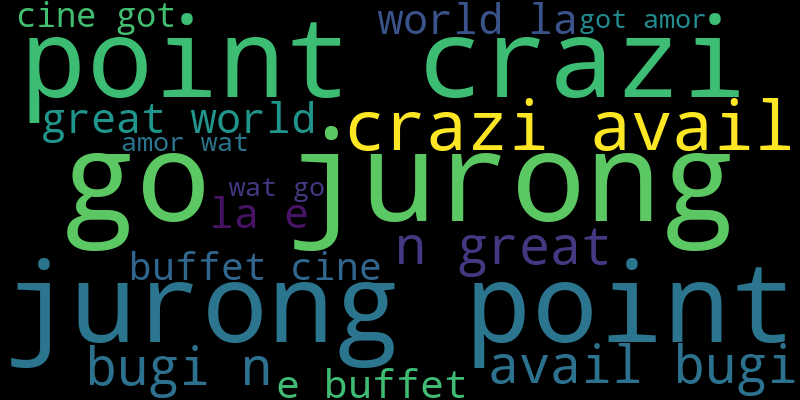

In [148]:
print("\033[91mSpam Subject:\033[0m")
wc = wordcloud.WordCloud(width=800, height=400).generate(' '.join([' '.join(words) for words in spam_words]))
wc.to_image()

ham Subject:


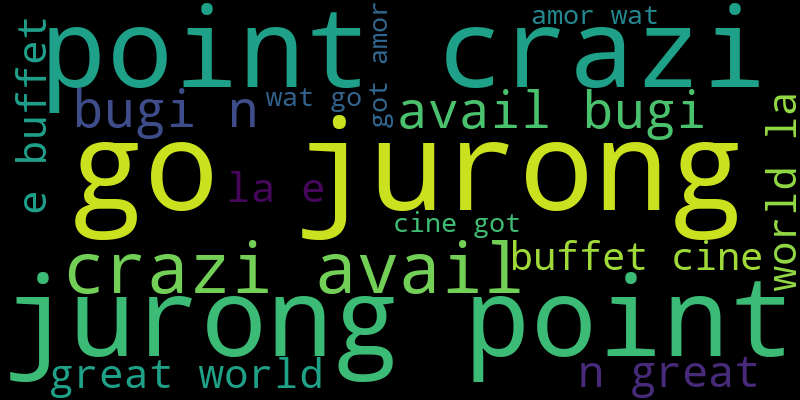

In [149]:
print("\033[92mham Subject:\033[0m")
wc2 = wordcloud.WordCloud(width=800, height=400).generate(' '.join([' '.join(words) for words in ham_words]))
wc2.to_image()


## II- Model

In [157]:
#split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(word_mtx_df, y, test_size=0.2, random_state=42)
# my data shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 5816)
(1115, 5816)
(4457,)
(1115,)


In [217]:

model = MultinomialNB(alpha= 1.48)

model.fit(X_train, y_train)

MultinomialNB(alpha=1.48)

In [222]:
# report
y_pred = model.predict(X_test)
print("\033[92mAccuracy:\033[0m ", accuracy_score(y_test, y_pred))
print("\033[91mClassification Report:\033[0m \n", classification_report(y_test, y_pred))

Accuracy:  0.9632286995515695
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.85      0.88      0.87       150

    accuracy                           0.96      1115
   macro avg       0.92      0.93      0.92      1115
weighted avg       0.96      0.96      0.96      1115



<Axes: >

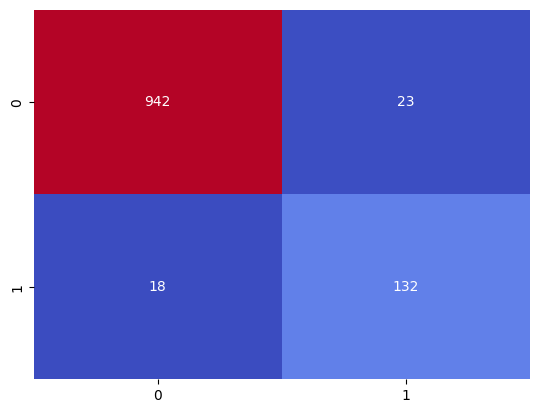

In [220]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d', cbar=False)

In [266]:
model2 = LogisticRegression(dual= False, penalty= None, solver= 'sag',tol=0.001)

model2.fit(X_train, y_train)

c:\Users\Ali.DE_Bouakaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag', tol=0.001)

In [267]:
y_pred2 = model2.predict(X_test)
print("\033[92mAccuracy:\033[0m ", accuracy_score(y_test, y_pred2))
print("\033[91mClassification Report:\033[0m \n", classification_report(y_test, y_pred2))

Accuracy:  0.97847533632287
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

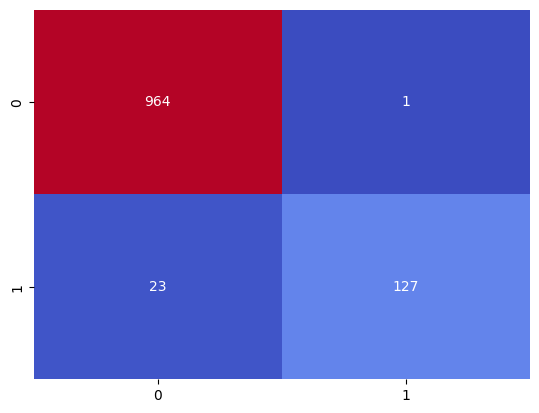

In [268]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap='coolwarm', fmt='d', cbar=False)

In [269]:
def model3(x):
    pred1 = model.predict(x)
    pred2 = model2.predict(x)
    
    proba1 = model.predict_proba(x)
    proba2 = model2.predict_proba(x)
    
    abs_val1 = abs(proba1[0][0] - proba1[0][1])
    abs_val2 = abs(proba2[0][0] - proba2[0][1])
    
    if abs_val1 > abs_val2:
        return pred1
    else:
        return pred2

y_pred3 = []
for cnt in range(len(X_test)):
    y_pred3.append(model3(X_test.iloc[cnt].values.reshape(1, -1))[0])


c:\Users\Ali.DE_Bouakaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\Users\Ali.DE_Bouakaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali.DE_Bouakaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\Users\Ali.DE_Bouakaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ali.DE_Bouakaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X 

In [270]:
# report
print("\033[92mAccuracy:\033[0m ", accuracy_score(y_test, y_pred3))
print("\033[91mClassification Report:\033[0m \n", classification_report(y_test, y_pred3))

Accuracy:  0.9802690582959641
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

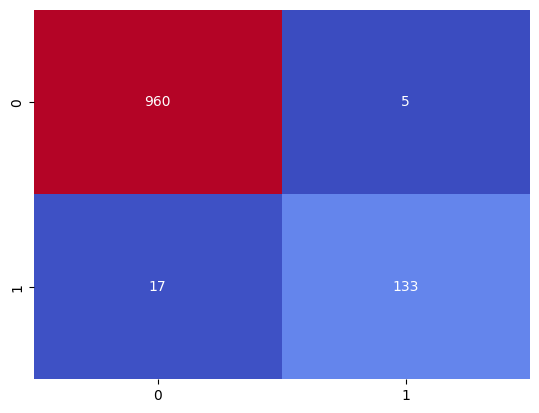

In [271]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, cmap='coolwarm', fmt='d', cbar=False)

## III- Finde the best paramiters

In [264]:
param_grid = {
    'tol': [1e-1,1e-2,1e-3, 1e-4, 1e-5],
}

In [265]:
search = GridSearchCV(model2, param_grid, n_jobs=-1, cv=3)
search.fit(X_train, y_train)

print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)

{'tol': 0.001}
0.9802547684108922
LogisticRegression(penalty=None, solver='sag', tol=0.001)


c:\Users\Ali.DE_Bouakaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# IV- Get more data